# Lab 3

## Part I: waves

Download the [wave buoy data for La Perouse Bank (off West Coast of VI)](http://www.ndbc.noaa.gov/station_realtime.php?station=46206). Use the _Real time standard meteorological data_ option. Before you start have a quick look at the _description_ - what kind of data is this? 

Download the data using a shell command. Read the data for the most recent 48 hours and store the first 10 columns into the variables `YY , MM, DD ,hh, mm, WDIR, WSPD, GST,  WVHT, DPD`.

In [1]:
%%bash
wget www.ndbc.noaa.gov/data/realtime2/46206.txt

--2018-02-05 19:52:11--  http://www.ndbc.noaa.gov/data/realtime2/46206.txt
Resolving www.ndbc.noaa.gov (www.ndbc.noaa.gov)... 140.90.238.27
Connecting to www.ndbc.noaa.gov (www.ndbc.noaa.gov)|140.90.238.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103212 (101K) [text/plain]
Saving to: '46206.txt'

     0K .......... .......... .......... .......... .......... 49% 60.8K 1s
    50K .......... .......... .......... .......... .......... 99%  357K 0s
   100K                                                       100% 1512G=1.0s

2018-02-05 19:52:12 (105 KB/s) - '46206.txt' saved [103212/103212]



In [2]:
%%bash
cp 46206.txt wave_data.txt
ls

46206.txt
Assignment.1
Lab.3.ipynb
Quizzes
README.md
history.txt
name.txt
wave_data.txt


In [3]:
# YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD
import numpy as np
data=np.loadtxt('wave_data.txt',usecols=range(0,10))
data=data[0:48,:]

In [4]:
data.shape

(48, 10)

In [5]:
YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD=np.split(data,10,1)

In [6]:
YY.shape

(48, 1)

Create a time variable that starts at `t=0 hrs` with the earliest time and goes forward in hours. Plot the wind speed as a function of this time variable.

In [7]:
time_in_hours=DD*24+hh
time_in_hours=np.flipud(time_in_hours)-time_in_hours[-1]
time_in_hours

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.]])

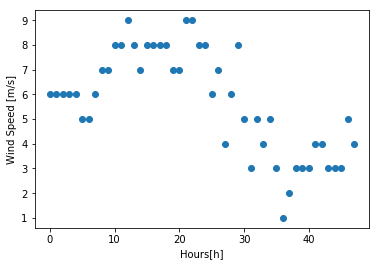

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Hours[h]')
plt.ylabel('Wind Speed [m/s]')
plt.plot(time_in_hours,WSPD,'o')
plt.show()
plt.close()

Smooth the data by forming a centered moving average (CMA), where each value is replaced by the average of the value and the neighboring value on each side. Plot this smoothed data along with the original data. 

Create a spline fit, using sympy's splrep/splev function. Adjust the smoothing parameter so that the spline fit looks similar to the CMA line.

In [12]:
n=1
WSPD_smoothed=[np.mean([WSPD[i-n:i+n+1]])for i in range(n,len(WSPD)-n)]
WVHT_smoothed=[np.mean([WVHT[i-n:i+n+1]])for i in range(n,len(WVHT)-n)]

In [ ]:
plt.figure()
plt.plot(time_in_hours[])

In [15]:
from scipy import interpolate 

In [19]:
s=100
WSPD_spline=interpolate.splrep(time_in_hours,WSPD,s=s)
spline_grid=np.linspace(1,47,200)
WSPD_eval=interpolate.splev(spline_grid, WSPD_spline)

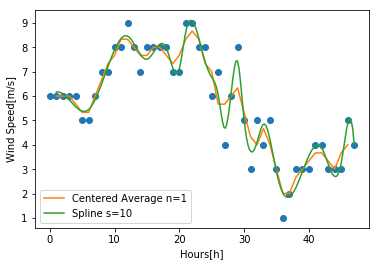

In [25]:
plt.figure()
plt.xlabel('Hours[h]')
plt.ylabel('Wind Speed[m/s]')
plt.plot(time_in_hours,WSPD,'o')
plt.plot(time_in_hours[n:len(time_in_hours)-n],WSPD_smoothed,label="Centered Average n=1")
plt.plot(spline_grid,WSPD_eval,label="Spline s=%s" %s)
plt.legend()
plt.show()
plt.close()

Make a plot of wave height agains wind speed using smoothed data.

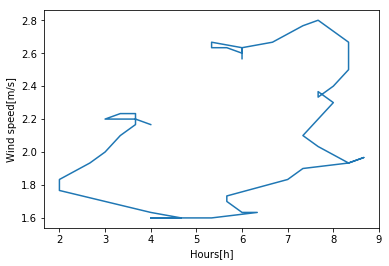

In [28]:
plt.figure()
plt.xlabel('Hours[h]')
plt.ylabel('Wind speed[m/s]')
plt.plot(WSPD_smoothed,WVHT_smoothed)
plt.show()
plt.close()

## Part II: units
How much water do you have to store on your 10m high roof-top in order to store enough potential energy, that - if transformed without losses - could run a 50W bulp for 5 hr?

In [ ]:
import astropy.units as u
import astropy.constants as c

## Part III: integrate 
Using scipy's `integrate.cumtrapz` integrate one more time the area under a quadrant of a circle to determine $\pi$.
